importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [20]:
X,y=make_blobs(n_samples=2000,n_features=2,cluster_std=3,centers=3,random_state=42)
n_features=X.shape[1]
m=X.shape[0]
print(X.shape,y.shape)

(2000, 2) (2000,)


plotting the graph to see the dataset classes

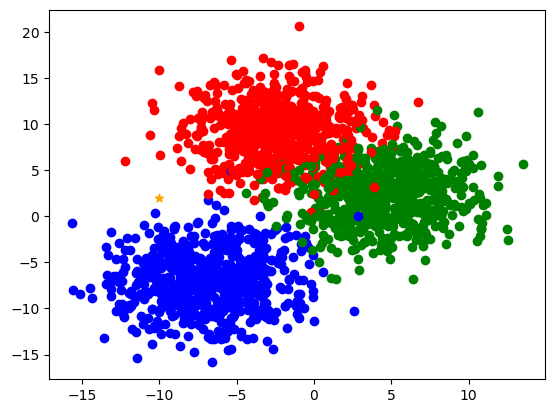

In [21]:
# test point to check for the nearest distance

xt=np.array([-10,2])

for i in range(m):
    if y[i]==0:
        plt.scatter(X[i,0],X[i,1],c='r',label="red")
    elif y[i]==1:
        plt.scatter(X[i,0],X[i,1],c='g',label="green")
    elif y[i]==2:
        plt.scatter(X[i,0],X[i,1],c='b',label="blue")

plt.scatter(xt[0],xt[1],color="orange",marker="*")
plt.show()


calculating the knn and distance

In [ ]:
def dis(X,xt):
    # calcualting the eucledian distance between the two point
    return np.sqrt(np.sum((X-xt)**2))


def knn(X,y,xt,k=5):
    m=X.shape[0]
    dist_list=[]
    for i in range(m):
        d=dis(X[i],xt)
        # appending the distance between the test point and the example points 
        # also appending a tuple with a label so that we can identify before classifying it 
        dist_list.append((d,y[i]))
    #  sorting the list to get the closest distance and the label where does it lie to
    dist_list=sorted(dist_list)
    # got the distance of k nearest after the array has been sorted according to the distances and its labels
    dist_list=np.array(dist_list[:k])
    # extracted the labels columns from distance array
    labels=dist_list[:,1]

    # got the count of the unique lables
    labels,cnts=np.unique(labels,return_counts=True)
    # got the index of the label having the maximum unique count value 
    idx=cnts.argmax()
    pred=labels[idx]

    return int(pred)


knn(X,y,xt)

[(1.6671279357808986, 2), (3.0798944949644245, 2), (3.147202704967561, 2), (3.1698135707408563, 2), (3.1743844492198945, 0)]


2